In [ ]:
import tensorflow.keras as keras
keras.__version__

'2.11.0'

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

![Conv_basics](https://www.researchgate.net/publication/326963855/figure/fig2/AS:658367580213249@1533978471914/The-sub-convolution-pooling-neural-network.png)


Let's display the architecture of our convnet so far:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

You can see above that the output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor of shape `(height, width, channels)`. The width 
and height dimensions tend to shrink as we go deeper in the network. The number of channels is controlled by the first argument passed to 
the `Conv2D` layers (e.g. 32 or 64).

The next step would be to feed our last output tensor (of shape `(3, 3, 64)`) into a densely-connected classifier network like those you are 
already familiar with: a stack of `Dense` layers. These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor. 
So first, we will have to flatten our 3D outputs to 1D, and then add a few `Dense` layers on top:

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

![Conv_dense](https://miro.medium.com/max/2000/0*HWj5PgxWxdcld_ye)

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network 
looks like:

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

As you can see, our `(3, 3, 64)` outputs were flattened into vectors of shape `(576,)`, before going through two `Dense` layers.

Now, let's train our convnet on the MNIST digits. We will reuse a lot of the code we have already covered in the MNIST example from Chapter 
2.

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
train_images = train_images.reshape((50000, 32, 32, 3))

test_images = test_images.reshape((10000, 32, 32, 3))

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs = 30, batch_size = 64, validation_data= (test_images, test_labels))

Epoch 1/30
782/782 [==============================] - 6s 6ms/step - loss: 2.0836 - accuracy: 0.3359 - val_loss: 1.4719 - val_accuracy: 0.4551
Epoch 2/30
782/782 [==============================] - 4s 5ms/step - loss: 1.3954 - accuracy: 0.5000 - val_loss: 1.2731 - val_accuracy: 0.5422
Epoch 3/30
782/782 [==============================] - 4s 6ms/step - loss: 1.2207 - accuracy: 0.5651 - val_loss: 1.1610 - val_accuracy: 0.5915
Epoch 4/30
782/782 [==============================] - 4s 5ms/step - loss: 1.1101 - accuracy: 0.6085 - val_loss: 1.1700 - val_accuracy: 0.5956
Epoch 5/30
782/782 [==============================] - 4s 5ms/step - loss: 1.0180 - accuracy: 0.6431 - val_loss: 1.1073 - val_accuracy: 0.6170
Epoch 6/30
782/782 [==============================] - 5s 6ms/step - loss: 0.9455 - accuracy: 0.6716 - val_loss: 1.0536 - val_accuracy: 0.6363
Epoch 7/30
782/782 [==============================] - 4s 5ms/step - loss: 0.8856 - accuracy: 0.6921 - val_loss: 1.0846 - val_accuracy: 0.6324
Epoch 

Let's evaluate the model on the test data:

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.7247 - accuracy: 0.6475


In [ ]:
test_acc

0.6474999785423279

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

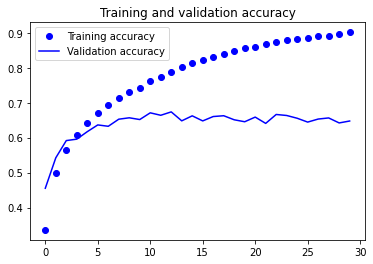

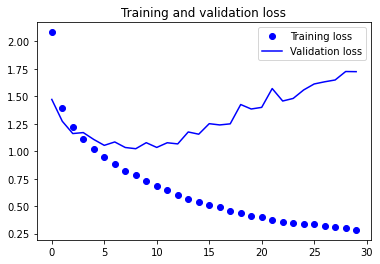

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Using data generator

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1 / 255)

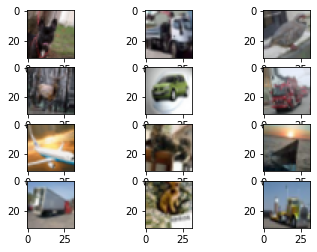

In [ ]:
for X_batch, y_batch in train_datagen.flow(train_images, train_labels, batch_size=  32):
    for i in range(0, 12):
        plt.subplot(4, 3, i + 1)
        plt.imshow(X_batch[i])
    plt.show()
    break

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 32, 32, 3)
test_images = test_images.reshape(test_images.shape[0], 32, 32, 3)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 1024)             

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_generator = train_datagen.flow(train_images, train_labels, batch_size = 64)
validation_generator  = test_datagen.flow(test_images, test_labels, batch_size = 64)

In [ ]:
history  = model.fit(train_generator, epochs = 50, batch_size= 64, steps_per_epoch = len(train_images) // 64,
                     validation_data = validation_generator, validation_steps = len(test_images) // 64)

Epoch 1/50
781/781 [==============================] - 35s 42ms/step - loss: 1.6107 - accuracy: 0.4100 - val_loss: 1.3801 - val_accuracy: 0.5056
Epoch 2/50
781/781 [==============================] - 34s 43ms/step - loss: 1.2965 - accuracy: 0.5341 - val_loss: 1.2406 - val_accuracy: 0.5510
Epoch 3/50
781/781 [==============================] - 34s 43ms/step - loss: 1.1559 - accuracy: 0.5895 - val_loss: 1.0455 - val_accuracy: 0.6368
Epoch 4/50
781/781 [==============================] - 32s 41ms/step - loss: 1.0635 - accuracy: 0.6241 - val_loss: 0.9684 - val_accuracy: 0.6636
Epoch 5/50
781/781 [==============================] - 34s 44ms/step - loss: 1.0048 - accuracy: 0.6460 - val_loss: 0.9443 - val_accuracy: 0.6706
Epoch 6/50
781/781 [==============================] - 33s 42ms/step - loss: 0.9628 - accuracy: 0.6605 - val_loss: 0.9722 - val_accuracy: 0.6637
Epoch 7/50
781/781 [==============================] - 34s 43ms/step - loss: 0.9256 - accuracy: 0.6732 - val_loss: 0.8528 - val_accuracy:

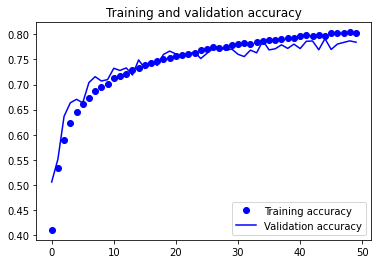

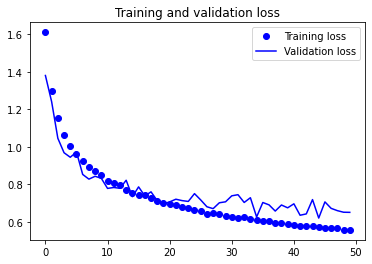

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('/content/cifar10.h5')

In [ ]:
from keras.models import load_model

model = load_model('/content/cifar10.h5')
model.summary()  # As a reminder.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

Using Pre-trained model

In [ ]:
from keras.applications import VGG16

vgg16 = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32,32,3))

In [ ]:
vgg16.trainable = False
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
from keras import Model

last = vgg16.output
x = keras.layers.Flatten()(last)
x = layers.Dropout(0.3)(x)
output = layers.Dense(10, activation='softmax')(x)
model = Model(vgg16.input, output)

# model = models.Sequential()
# model.add(vgg16)
# model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

train_datagen = ImageDataGenerator(
    preprocessing_function= preprocess_input,
    #rescale = 1./ 255,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(preprocessing_function= preprocess_input,
                                  #rescale=1./ 255,
                                  )

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 32, 32, 3)
test_images = test_images.reshape(test_images.shape[0], 32, 32, 3)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_generator = train_datagen.flow(train_images, train_labels, batch_size = 64)
validation_generator  = test_datagen.flow(test_images, test_labels, batch_size = 64)

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
my_callbacks = [EarlyStopping(patience = 3), checkpoint]

In [ ]:
model.compile(optimizer= keras.optimizers.Adam(learning_rate = 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history  = model.fit(train_generator, epochs = 10, batch_size= 64, steps_per_epoch = len(train_images) // 64,
                     validation_data = validation_generator, validation_steps = len(test_images) // 64, callbacks = my_callbacks)

Epoch 1/10
781/781 [==============================] - 39s 49ms/step - loss: 6.4485 - accuracy: 0.4282 - val_loss: 1.9226 - val_accuracy: 0.5790
Epoch 2/10
781/781 [==============================] - 36s 46ms/step - loss: 1.9495 - accuracy: 0.5034 - val_loss: 1.3565 - val_accuracy: 0.5909
Epoch 3/10
781/781 [==============================] - 35s 45ms/step - loss: 1.6874 - accuracy: 0.5075 - val_loss: 1.3454 - val_accuracy: 0.5852
Epoch 4/10
781/781 [==============================] - 35s 45ms/step - loss: 1.6854 - accuracy: 0.5052 - val_loss: 1.3404 - val_accuracy: 0.5861
Epoch 5/10
781/781 [==============================] - 37s 48ms/step - loss: 1.6908 - accuracy: 0.5041 - val_loss: 1.4392 - val_accuracy: 0.5718
Epoch 6/10
781/781 [==============================] - 36s 46ms/step - loss: 1.7059 - accuracy: 0.5046 - val_loss: 1.3555 - val_accuracy: 0.5850
Epoch 7/10
781/781 [==============================] - 35s 45ms/step - loss: 1.6960 - accuracy: 0.5054 - val_loss: 1.3890 - val_accuracy:

In [ ]:
from keras.models import load_model
model = load_model('best_model.h5')

In [ ]:
model.trainable = True

In [ ]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate= 0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
def lr_scheduler(epoch):
    initial_lr = 0.0001
    drop = 0.9
    epochs_drop = 1
    lr = initial_lr * drop**((1+epoch)//epochs_drop)
    return lr

reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

In [ ]:
my_callbacks = [EarlyStopping(patience = 2), checkpoint, reduce_lr]

In [ ]:
history  = model.fit(train_generator, epochs = 20, batch_size= 64, steps_per_epoch = len(train_images) // 64,
                     validation_data = validation_generator, validation_steps = len(test_images) // 64, callbacks = my_callbacks)

Epoch 1/20
781/781 [==============================] - 48s 55ms/step - loss: 0.8959 - accuracy: 0.6932 - val_loss: 0.5975 - val_accuracy: 0.8016 - lr: 9.0000e-05
Epoch 2/20
781/781 [==============================] - 44s 57ms/step - loss: 0.5875 - accuracy: 0.8014 - val_loss: 0.5966 - val_accuracy: 0.8047 - lr: 8.1000e-05
Epoch 3/20
781/781 [==============================] - 44s 57ms/step - loss: 0.4812 - accuracy: 0.8345 - val_loss: 0.4581 - val_accuracy: 0.8538 - lr: 7.2900e-05
Epoch 4/20
781/781 [==============================] - 43s 55ms/step - loss: 0.4044 - accuracy: 0.8611 - val_loss: 0.4147 - val_accuracy: 0.8640 - lr: 6.5610e-05
Epoch 5/20
781/781 [==============================] - 44s 56ms/step - loss: 0.3468 - accuracy: 0.8801 - val_loss: 0.4360 - val_accuracy: 0.8623 - lr: 5.9049e-05
Epoch 6/20
781/781 [==============================] - 44s 57ms/step - loss: 0.3002 - accuracy: 0.8991 - val_loss: 0.4135 - val_accuracy: 0.8640 - lr: 5.3144e-05
Epoch 7/20
781/781 [==============

In [ ]:
from keras.models import load_model
model = load_model('best_model.h5')

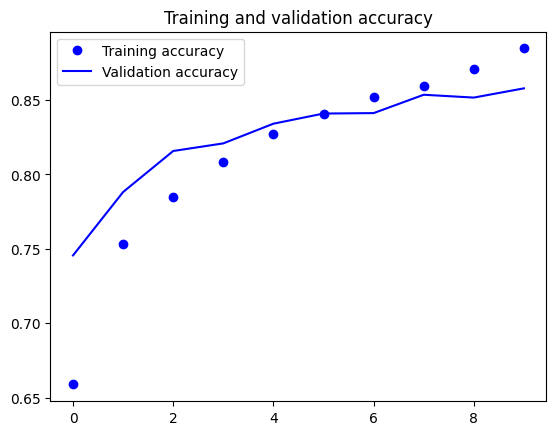

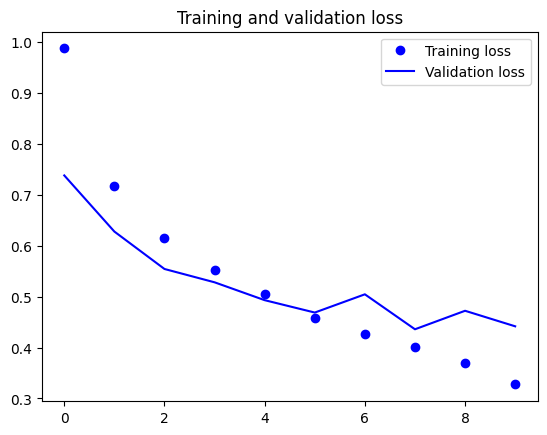

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()